In [2]:
library(tidyverse)
library(RCurl)
library(tidymodels)
library(dplyr)
library(purrr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘RCurl’


The following object is masked from ‘package:tidyr’:

    complete


Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.8      ✔ rsample   0.0.7 
✔ infe

In [3]:
# Read Data from a Github Repo where we put our data.csv file downloaded from Kaggle
url = "https://raw.githubusercontent.com/Zane-Z/DSCI-100-Group-Project/main/data.csv"
data = read_csv(url)
head(data)

Parsed with column specification:
cols(
  CRIM = col_double(),
  ZN = col_double(),
  INDUS = col_double(),
  CHAS = col_double(),
  NOX = col_double(),
  RM = col_double(),
  AGE = col_double(),
  DIS = col_double(),
  RAD = col_double(),
  TAX = col_double(),
  PTRATIO = col_double(),
  B = col_double(),
  LSTAT = col_double(),
  MEDV = col_double()
)



CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [4]:
set.seed(2000)
data_split <- initial_split(data, prop = 0.75, strata = CRIM)
data_training <- training(data_split)
data_testing <- testing(data_split)

is.na(any(data_training))

Warning message in any(structure(c(0.02731, 0.02729, 0.03237, 0.02985, 0.08829, :
“coercing argument of type 'double' to logical”


[1] FALSE

In [5]:
funs <- c(mean = mean, median = median, std = sd)
args <- list(na.rm = TRUE)
data_analysis <- data_training %>%
            select(CRIM, TAX, PTRATIO, B) %>%
              map_df(~ funs %>%
               map(exec, .x, !!!args), .id = "var")
data_analysis

var,mean,median,std
<chr>,<dbl>,<dbl>,<dbl>
CRIM,3.583873,0.26266,8.601609
TAX,407.966146,334.50000,166.984830
PTRATIO,18.419271,18.95000,2.278161
B,355.572005,390.81500,90.374056


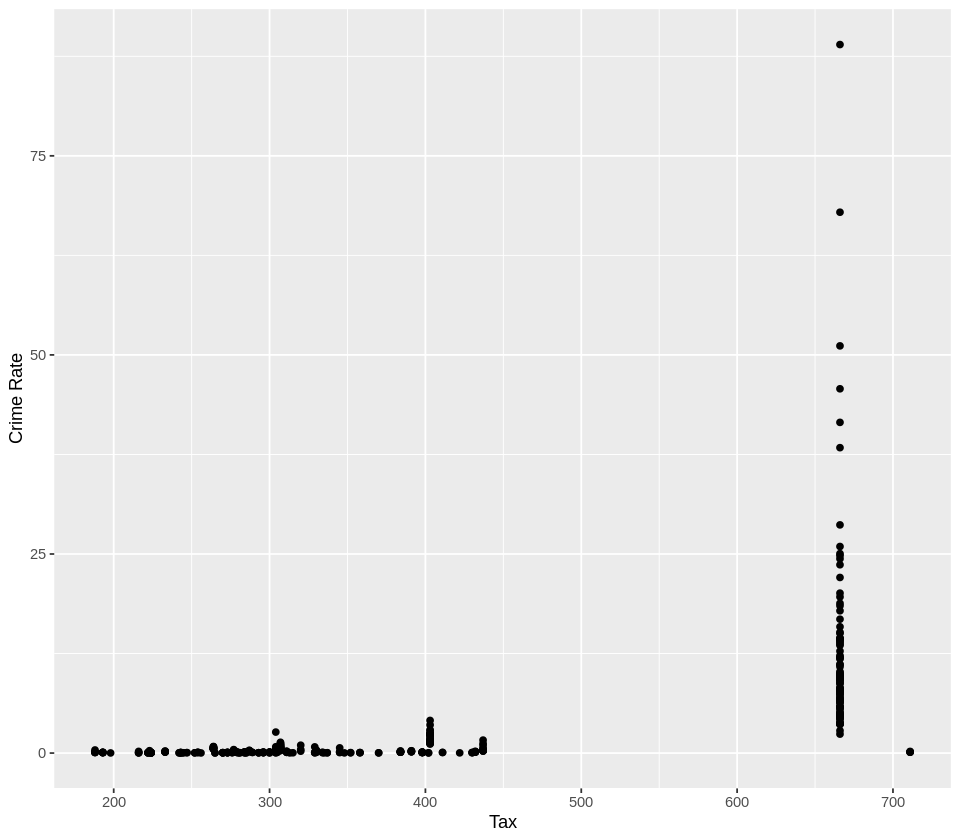

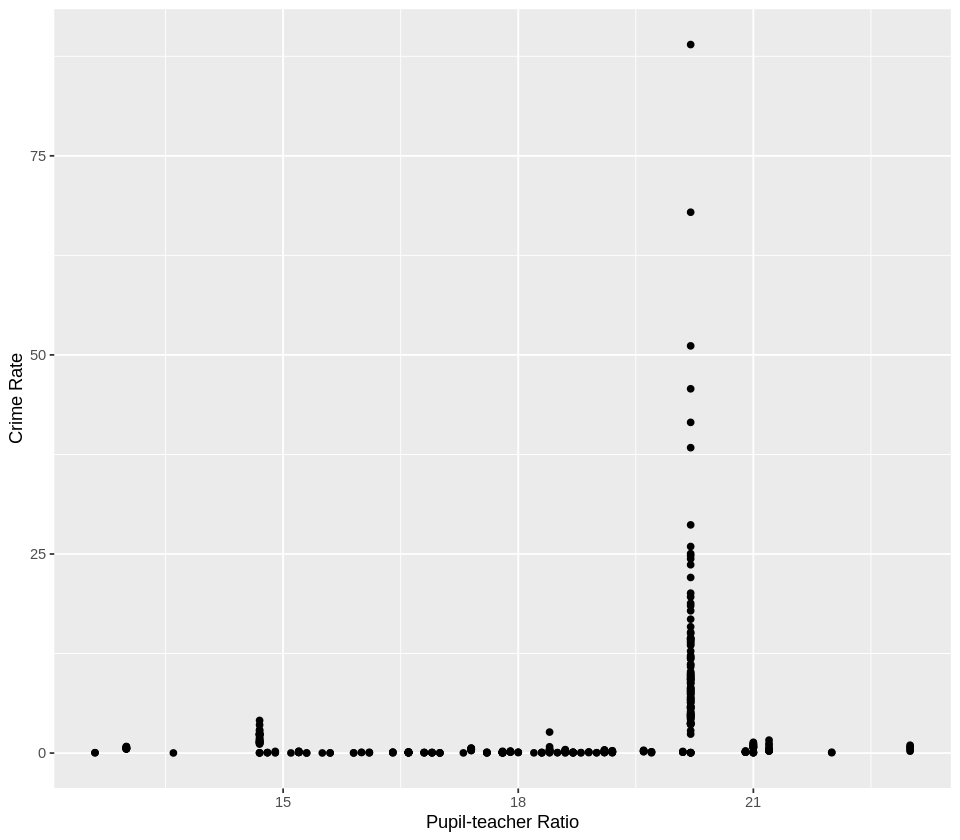

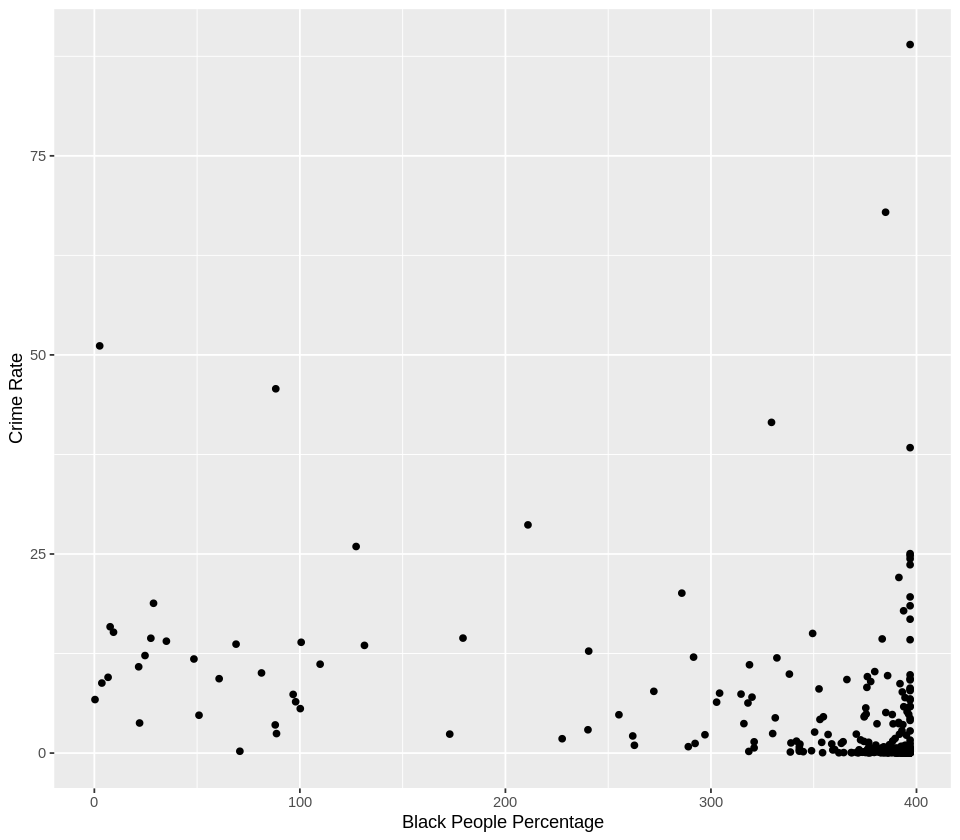

In [7]:
# FIXME:
# display <- function (x_value, x_axis) {
# options(repr.plot.width = 8, repr.plot.height = 7)
# plot <- ggplot(data_training, aes(x = x_value, y = CRIM)) +
#   geom_point() + 
#   xlab(x_axis) +
#   ylab("Crime Rate")
# plot
# }

# display(TAX, "Tax")

plot_tax <- ggplot(data_training, aes(x = TAX, y = CRIM)) +
  geom_point() + 
  xlab("Tax") +
  ylab("Crime Rate")

plot_pt <- ggplot(data_training, aes(x = PTRATIO, y = CRIM)) +
  geom_point() + 
  xlab("Pupil-teacher Ratio") +
  ylab("Crime Rate")

plot_b <- ggplot(data_training, aes(x = B, y = CRIM)) +
  geom_point() + 
  xlab("Black People Percentage") +
  ylab("Crime Rate")

plot_tax
plot_pt
plot_b